If we talk about classification problems, the most common metrics used are:
- Accuracy
- Precision (P)
- Recall (R)
- F1 score (F1)
- Area under the ROC (Receiver Operating Characteristic) curve or simply AUC (AUC)
- Log loss
- Precision at k (P@k)
- Average precision at k (AP@k)
- Mean average precision at k (MAP@k)
When it comes to regression, the most commonly used evaluation metrics are:
- Mean absolute error (MAE)
- Mean squared error (MSE)
- Root mean squared error (RMSE)
- Root mean squared logarithmic error (RMSLE)
- Mean percentage error (MPE)
- Mean absolute percentage error (MAPE)
- R2

### Accuracy: 

It is one of the most straightforward metrics used in machine learning. It defines how accurate your model is. if you 
build a model that classifies 90 images accurately, your accuracy is 90% or 0.90. If only 83 images are classified correctly, the accuracy of your model is 83% or 0.83. 
Simple.

In [4]:
def accuracy(y_true, y_pred):
 """
 Function to calculate accuracy
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: accuracy score
 """
 # initialize a simple counter for correct predictions
 correct_counter = 0
 # loop over all elements of y_true
 # and y_pred "together"
 for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            # if prediction is equal to truth, increase the counter
            correct_counter += 1
            # return accuracy
            # which is correct predictions over the number of samples
            return correct_counter / len(y_true)

Now, let’s say we change the dataset a bit such that there are 180 chest x-ray images 
which do not have pneumothorax and only 20 with pneumothorax. Even in this 
case, we will create the training and validation sets with the same ratio of positive 
to negative (pneumothorax to non- pneumothorax) targets. In each set, we have 90 
non- pneumothorax and 10 pneumothorax images. If you say that all images in the 
validation set are non-pneumothorax, what would your accuracy be? Let’s see; you
classified 90% of the images correctly. So, your accuracy is 90%. 

But look at it one more time. 

You didn’t even build a model and got an accuracy of 90%. That seems kind of 
useless. If we look carefully, we will see that the dataset is skewed, i.e., the number 
of samples in one class outnumber the number of samples in other class by a lot. In 
these kinds of cases, it is not advisable to use accuracy as an evaluation metric as it 
is not representative of the data. So, you might get high accuracy, but your model 
will probably not perform that well when it comes to real-world samples, and you 
won’t be able to explain to your managers why.

In these cases, it’s better to look at other metrics such as precision. 
Before learning about precision, we need to know a few terms. Here we have 
assumed that chest x-ray images with pneumothorax are positive class (1) and 
without pneumothorax are negative class (0).

True positive (TP): Given an image, if your model predicts the image has 
pneumothorax, and the actual target for that image has pneumothorax, it is 
considered a true positive.

True negative (TN): Given an image, if your model predicts that the image does not 
have pneumothorax and the actual target says that it is a non-pneumothorax image, 
it is considered a true negative.

In simple words, if your model correctly predicts positive class, it is true positive, 
and if your model accurately predicts negative class, it is a true negative.

False positive (FP): Given an image, if your model predicts pneumothorax and the 
actual target for that image is non- pneumothorax, it a false positive.

False negative (FN): Given an image, if your model predicts non-pneumothorax 
and the actual target for that image is pneumothorax, it is a false negative.

In simple words, if your model incorrectly (or falsely) predicts positive class, it is 
a false positive. If your model incorrectly (or falsely) predicts negative class, it is a 
false negative

In [6]:
def true_positive(y_true, y_pred):
 """
 Function to calculate True Positives
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: number of true positives
 """
 # initialize
 tp = 0
 for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
 return tp

def true_negative(y_true, y_pred):
 """
 Function to calculate True Negatives
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: number of true negatives
 """
 # initialize
 tn = 0
 for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
 return tn

def false_positive(y_true, y_pred):
 """
 Function to calculate False Positives
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: number of false positives
 """
 # initialize
 fp = 0
 for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
 return fp

def false_negative(y_true, y_pred):
 """
 Function to calculate False Negatives
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: number of false negatives
 """
 # initialize
 fn = 0
 for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
 return fn

In [9]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

true_positive(l1, l2)

2

In [10]:
false_positive(l1, l2)

1

In [11]:
false_negative(l1, l2)

2

In [12]:
true_negative(l1, l2)

3

If we have to define accuracy using the terms described above, we can write:
Accuracy Score = (TP + TN) / (TP + TN + FP + FN)

In [13]:
def accuracy_v2(y_true, y_pred):
 """
 Function to calculate accuracy using tp/tn/fp/fn
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: accuracy score
 """
 tp = true_positive(y_true, y_pred)
 fp = false_positive(y_true, y_pred)
 fn = false_negative(y_true, y_pred)
 tn = true_negative(y_true, y_pred)
 accuracy_score = (tp + tn) / (tp + tn + fp + fn)
 return accuracy_score

In [14]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

accuracy(l1, l2)

0.125

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(l1, l2)

0.625

Precision is defined as:
Precision = TP / (TP + FP)

In [18]:
def precision(y_true, y_pred):
 """
 Function to calculate precision
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: precision score
 """
 tp = true_positive(y_true, y_pred)
 fp = false_positive(y_true, y_pred)
 precision = tp / (tp + fp)
 return precision

In [19]:
precision(l1, l2)

0.6666666666666666

Recall is defined as:
Recall = TP / (TP + FN)

In [20]:
def recall(y_true, y_pred):
 """
 Function to calculate recall
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: recall score
 """
 tp = true_positive(y_true, y_pred)
 fn = false_negative(y_true, y_pred)
 recall = tp / (tp + fn)
 return recall

In [21]:
 recall(l1, l2)

0.5

And that matches our calculated value!

For a “good” model, our precision and recall values should be high. We see that in 
the above example, the recall value is quite high. However, precision is very low! 
Our model produces quite a lot of false positives but less false negatives. Fewer
false negatives are good in this type of problem because you don’t want to say that 

patients do not have pneumothorax when they do. That is going to be more harmful. 
But we do have a lot of false positives, and that’s not good either.
Most of the models predict a probability, and when we predict, we usually choose 
this threshold to be 0.5. This threshold is not always ideal, and depending on this 
threshold, your value of precision and recall can change drastically. If for every 
threshold we choose, we calculate the precision and recall values, we can create a 
plot between these sets of values. This plot or curve is known as the precision-recall 
curve.

In [23]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708, 0.0490937, 0.0191491, 0.17554844,0.15952202, 
          0.03819563, 0.11639273, 0.079377, 0.08584789, 0.39095342, 0.27259048, 0.03447096,
          0.04644807,0.03543574, 0.18521942, 0.05934905, 0.61977213, 0.33056815]

So, y_true is our targets, and y_pred is the probability values for a sample being 
assigned a value of 1. So, now, we look at probabilities in prediction instead of the 
predicted value (which is most of the time calculated with a threshold at 0.5).

In [24]:
precisions = []
recalls = []

# how we assumed these thresholds is a long story
thresholds = [0.0490937 , 0.05934905, 0.079377, 0.08584789, 0.11114267, 0.11639273, 
              0.15952202, 0.17554844, 0.18521942, 0.27259048, 0.31620708, 0.33056815, 0.39095342, 0.61977213]

# for every threshold, calculate predictions in binary
# and append calculated precisions and recalls
# to their respective lists

for i in thresholds:
 temp_prediction = [1 if x >= i else 0 for x in y_pred]
 p = precision(y_true, temp_prediction)
 r = recall(y_true, temp_prediction)
 precisions.append(p)
 recalls.append(r)

Now, we can plot these values of precisions and recalls.

Text(0, 0.5, 'Precision')

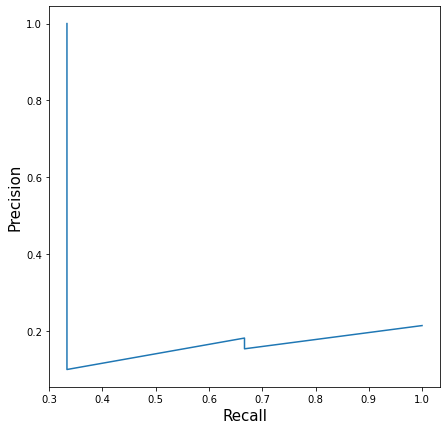

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

You will notice that it’s challenging to choose a value of threshold that gives both 
good precision and recall values. If the threshold is too high, you have a smaller
number of true positives and a high number of false negatives. This decreases your 
recall; however, your precision score will be high. If you reduce the threshold too 
low, false positives will increase a lot, and precision will be less.

Both precision and recall range from 0 to 1 and a value closer to 1 is better.

F1 score is a metric that combines both precision and recall. It is defined as a simple 
weighted average (harmonic mean) of precision and recall. If we denote precision 
using P and recall using R, we can represent the F1 score as:

F1 = 2PR / (P + R)

A little bit of mathematics will lead you to the following equation of F1 based on 

TP, FP and FN

F1 = 2TP / (2TP + FP + FN)

In [27]:
def f1(y_true, y_pred):
 """
 Function to calculate f1 score
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: f1 score
 """
 p = precision(y_true, y_pred)
 r = recall(y_true, y_pred)
 score = 2 * p * r / (p + r)
 return score

In [29]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

f1(y_true, y_pred)

0.5714285714285715

In [31]:
from sklearn import metrics
metrics.f1_score(y_true, y_pred)

0.5714285714285715

Instead of looking at precision and recall individually, you can also just look at F1
score. Same as for precision, recall and accuracy, F1 score also ranges from 0 to 1,
and a perfect prediction model has an F1 of 1. When dealing with datasets that have 
skewed targets, we should look at F1 (or precision and recall) instead of accuracy.

Then there are other crucial terms that we should know about. 

The first one is TPR or True Positive Rate, which is the same as recall.
TPR = TP / (TP + FN)

TPR or recall is also known as sensitivity.


In [32]:
def tpr(y_true, y_pred):
 """
 Function to calculate tpr
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: tpr/recall
 """
 return recall(y_true, y_pred)

And FPR or False Positive Rate, which is defined as:

FPR = FP / (TN + FP)

And 1 - FPR is known as specificity or True Negative Rate or TNR.

In [33]:
def fpr(y_true, y_pred):
 """
 Function to calculate fpr
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: fpr
 """
 fp = false_positive(y_true, y_pred)
 tn = true_negative(y_true, y_pred)
 return fp / (tn + fp)

These are a lot of terms, but the most important ones out of these are only TPR and 
FPR. 

Let’s assume that we have only 15 samples and their target values are binary:
Actual targets : [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1]

We train a model like the random forest, and we can get the probability of when a 
sample is positive.


Predicted probabilities for 1: [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 
0.2, 0.85, 0.15, 0.99]

For a typical threshold of >= 0.5, we can evaluate all the above values of precision, 
recall/TPR, F1 and FPR. But we can do the same if we choose the value of the 
threshold to be 0.4 or 0.6. In fact, we can choose any value between 0 and 1 and 
calculate all the metrics described above.

Let’s calculate only two values, though: TPR and FPR

In [34]:
# empty lists to store tpr 
# and fpr values
tpr_list = []
fpr_list = []
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1, 
 0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 
 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 
 0.85, 0.15, 0.99]
# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
# loop over all thresholds
for thresh in thresholds: 
 # calculate predictions for a given threshold
 temp_pred = [1 if x >= thresh else 0 for x in y_pred]
 # calculate tpr
 temp_tpr = tpr(y_true, temp_pred)
 # calculate fpr
 temp_fpr = fpr(y_true, temp_pred)
 # append tpr and fpr to lists
 tpr_list.append(temp_tpr)
 fpr_list.append(temp_fpr)

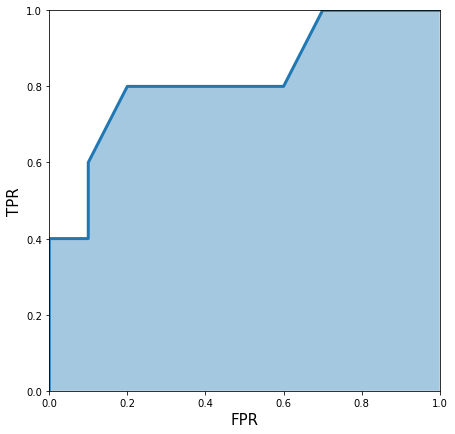

In [39]:
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

This curve is also known as the Receiver Operating Characteristic (ROC). And 
if we calculate the area under this ROC curve, we are calculating another metric 
which is used very often when you have a dataset which has skewed binary targets. 
This metric is known as the Area Under ROC Curve or Area Under Curve or 
just simply AUC. There are many ways to calculate the area under the ROC curve. 

In [40]:
 metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

AUC values range from 0 to 1.

- AUC = 1 implies you have a perfect model. Most of the time, it means that 
you made some mistake with validation and should revisit data processing 
and validation pipeline of yours. If you didn’t make any mistakes, then 
congratulations, you have the best model one can have for the dataset you 
built it on.

- AUC = 0 implies that your model is very bad (or very good!). Try inverting 
the probabilities for the predictions, for example, if your probability for the 
positive class is p, try substituting it with 1-p. This kind of AUC may also 
mean that there is some problem with your validation or data processing.

- AUC = 0.5 implies that your predictions are random. So, for any binary 

classification problem, if I predict all targets as 0.5, I will get an AUC of 
0.5.
AUC values between 0 and 0.5 imply that your model is worse than random. Most 
of the time, it’s because you inverted the classes. If you try to invert your 
predictions, your AUC might become more than 0.5. AUC values closer to 1 are 
considered good.

But what does AUC say about our model? 

Suppose you get an AUC of 0.85 when you build a model to detect pneumothorax 
from chest x-ray images. This means that if you select a random image from your 
dataset with pneumothorax (positive sample) and another random image without 
pneumothorax (negative sample), then the pneumothorax image will rank higher 
than a non-pneumothorax image with a probability of 0.85.


In [45]:
# empty lists to store true positive 
# and false positive values
tp_list = []
fp_list = []
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]
# some handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
# loop over all thresholds
for thresh in thresholds: 
# calculate predictions for a given threshold
 temp_pred = [1 if x >= thresh else 0 for x in y_pred]
 # calculate tp
 temp_tp = true_positive(y_true, temp_pred)
 # calculate fp
 temp_fp = false_positive(y_true, temp_pred)
 # append tp and fp to lists
 tp_list.append(temp_tp)
 fp_list.append(temp_fp)

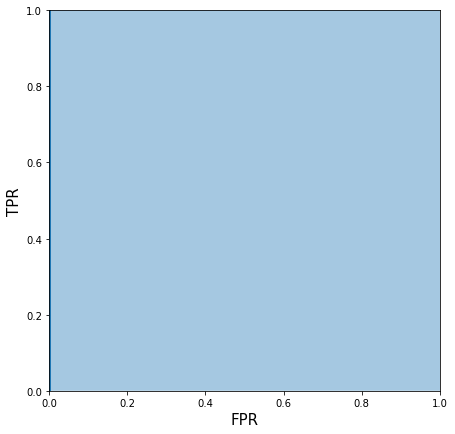

In [46]:
plt.figure(figsize=(7, 7))
plt.fill_between(fp_list, tp_list, alpha=0.4)
plt.plot(fp_list, tp_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

Most of the time, the top-left value on ROC curve should give you a quite good 
threshold, as shown in figure .

Another important metric you should learn after learning AUC is log loss. In case 
of a binary classification problem, we define log loss as:

Log Loss = - 1.0 * ( target * log(prediction) + (1 - target) * log(1 - prediction) )

Where target is either 0 or 1 and prediction is a probability of a sample belonging 
to class 1.

For multiple samples in the dataset, the log-loss over all samples is a mere average 
of all individual log losses. One thing to remember is that log loss penalizes quite 
high for an incorrect or a far-off prediction, i.e. log loss punishes you for being very 
sure and very wrong

In [50]:
import numpy as np
def log_loss(y_true, y_proba):
    
 """
 Function to calculate log loss
 :param y_true: list of true values
 :param y_proba: list of probabilities for 1
 :return: overall log loss
 """
 # define an epsilon value
 # this can also be an input
 # this value is used to clip probabilities
 epsilon = 1e-15
 # initialize empty list to store
 # individual losses
 loss = []
 # loop over all true and predicted probability values
 for yt, yp in zip(y_true, y_proba):
 # adjust probability
 # 0 gets converted to 1e-15
 # 1 gets converted to 1-1e-15
 # Why? Think about it!
     yp = np.clip(yp, epsilon, 1 - epsilon)
     # calculate loss for one sample
     temp_loss = - 1.0 * (yt * np.log(yp) + (1 - yt) * np.log(1 - yp))
     # add to loss list
     loss.append(temp_loss)
 # return mean loss over all samples
 return np.mean(loss)

In [51]:
y_true = [0, 0, 0, 0, 1, 0, 1,0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2,0.85, 0.15, 0.99]
log_loss(y_true, y_proba)

0.49882711861432294

We can compare this with scikit-learn

In [52]:
metrics.log_loss(y_true, y_proba)

0.49882711861432294

Thus, our implementation is correct. Implementation of log loss is easy. 
Interpretation may seem a bit difficult. You must remember that log loss penalizes 
a lot more than other metrics. 
For example, if you are 51% sure about a sample belonging to class 1, log loss 
would be:

- 1.0 * ( 1 * log(0.51) + (1 - 1) * log(1 – 0.51) ) = 0.67

And if you are 49% sure for a sample belonging to class 0, log loss would be:

- 1.0 * ( 0 * log(0.49) + (1 - 0) * log(1 – 0.49) ) = 0.67

So, even though we can choose a cut off at 0.5 and get perfect predictions, we will 
still have a very high log loss. So, when dealing with log loss, you need to be very 
careful; any non-confident prediction will have a very high log loss.

There are three different ways to calculate this which might get confusing from time 
to time. Let’s assume we are interested in precision first. We know that precision 
depends on true positives and false positives.

- Macro averaged precision: calculate precision for all classes individually 
and then average them
- Micro averaged precision: calculate class wise true positive and false 
positive and then use that to calculate overall precision
- Weighted precision: same as macro but in this case, it is weighted average 
depending on the number of items in each class


In [62]:
import numpy as np
def macro_precision(y_true, y_pred):
 """
 Function to calculate macro averaged precision
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: macro precision score
 """
 
 # find the number of classes by taking
 # length of unique values in true list
 num_classes = len(np.unique(y_true))
 
 # initialize precision to 0
 precision = 0
 
 # loop over all classes
 for class_ in range(num_classes):
 
 # all classes except current are considered negative
     temp_true = [1 if p == class_ else 0 for p in y_true]
     temp_pred = [1 if p == class_ else 0 for p in y_pred]
 
 # calculate true positive for current class
     tp = true_positive(temp_true, temp_pred)
 
 # calculate false positive for current class
     fp = false_positive(temp_true, temp_pred)
 
 # calculate precision for current class
     temp_precision = tp / (tp + fp)
 
 # keep adding precision for all classes
     precision += temp_precision
 # calculate and return average precision over all classes
     precision /= num_classes
 return precision

In [58]:
import numpy as np
def micro_precision(y_true, y_pred):
 """
 Function to calculate micro averaged precision
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: micro precision score
 """
 
 # find the number of classes by taking
 # length of unique values in true list
 num_classes = len(np.unique(y_true))
 
 # initialize tp and fp to 0
 tp = 0
 fp = 0
 
 # loop over all classes
 for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
 
 # calculate true positive for current class
 # and update overall tp
        tp += true_positive(temp_true, temp_pred)
 
 # calculate false positive for current class
 # and update overall tp
        fp += false_positive(temp_true, temp_pred)
 
 # calculate and return overall precision
 precision = tp / (tp + fp)
 return precision

In [59]:
#Now, let’s look at the implementation of weighted precision.

from collections import Counter
import numpy as np
def weighted_precision(y_true, y_pred):
 """
 Function to calculate weighted averaged precision
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: weighted precision score
 """
 
 # find the number of classes by taking
 # length of unique values in true list
 num_classes = len(np.unique(y_true))
 
 # create class:sample count dictionary
 # it looks something like this:
 # {0: 20, 1:15, 2:21}
 class_counts = Counter(y_true)
 
 # initialize precision to 0
 precision = 0
 
 # loop over all classes
 for class_ in range(num_classes):
 # all classes except current are considered negative
     temp_true = [1 if p == class_ else 0 for p in y_true]
     temp_pred = [1 if p == class_ else 0 for p in y_pred]
 
 # calculate tp and fp for class
     tp = true_positive(temp_true, temp_pred)
     fp = false_positive(temp_true, temp_pred)
 
 # calculate precision of class
     temp_precision = tp / (tp + fp)
 
 # multiply precision with count of samples in class
     weighted_precision = class_counts[class_] * temp_precision
 
 # add to overall precision
     precision += weighted_precision
 # calculate overall precision by dividing by
 # total number of samples
     overall_precision = precision / len(y_true)

 return overall_precision

In [63]:
from sklearn import metrics
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]
macro_precision(y_true, y_pred)

0.39814814814814814

In [64]:
metrics.precision_score(y_true, y_pred, average="macro")

0.3611111111111111

In [65]:
micro_precision(y_true, y_pred)

0.4444444444444444

In [66]:
metrics.precision_score(y_true, y_pred, average="micro")

0.4444444444444444

In [67]:
weighted_precision(y_true, y_pred)

0.39814814814814814

In [68]:
metrics.precision_score(y_true, y_pred, average="weighted")

0.39814814814814814

Similarly, we can implement the recall metric for multi-class. Precision and recall 
depend on true positive, false positive and false negative while F1 depends on 
precision and recall. 

In [70]:
from collections import Counter
import numpy as np
def weighted_f1(y_true, y_pred):
 """
 Function to calculate weighted f1 score
 :param y_true: list of true values
 :param y_proba: list of predicted values
 :return: weighted f1 score
 """
 
 # find the number of classes by taking
 # length of unique values in true list
 num_classes = len(np.unique(y_true))
 
 # create class:sample count dictionary
 # it looks something like this:
 # {0: 20, 1:15, 2:21}
 class_counts = Counter(y_true)
 
 # initialize f1 to 0
 f1 = 0
 
 # loop over all classes
 for class_ in range(num_classes):
 # all classes except current are considered negative
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]
 
 # calculate precision and recall for class
    p = precision(temp_true, temp_pred)
    r = recall(temp_true, temp_pred)
 
 # calculate f1 of class
 if p + r != 0:
    temp_f1 = 2 * p * r / (p + r)
 else:
    temp_f1 = 0
 
 # multiply f1 with count of samples in class
 weighted_f1 = class_counts[class_] * temp_f1
 
 # add to f1 precision
 f1 += weighted_f1

# calculate overall F1 by dividing by
 # total number of samples
 overall_f1 = f1 / len(y_true)
 return overall_f1

In [71]:
weighted_f1(y_true, y_pred)

0.126984126984127

In [72]:
metrics.f1_score(y_true, y_pred, average="weighted")

0.41269841269841273

### Confusion matrix

Text(0.5, 50.5, 'Predicted Labels')

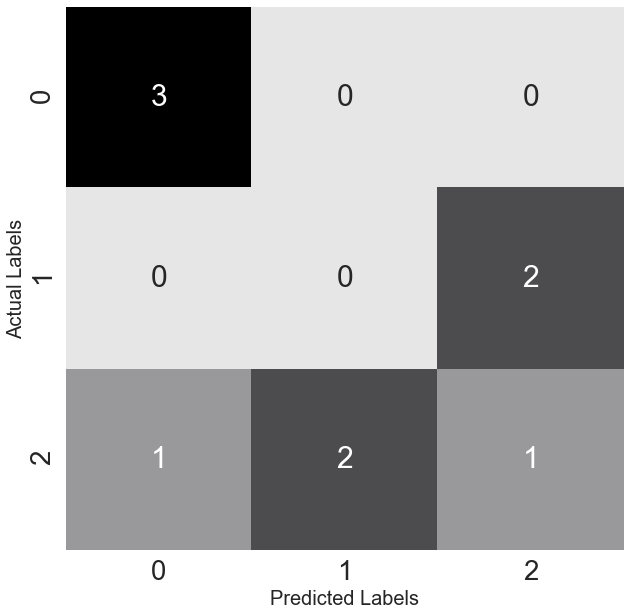

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
# some targets
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
#some predictions
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]
# get confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)

# plot using matplotlib and seaborn
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)

, one image can have multiple targets associated with it. This type of 
problem is the multi-label classification problem.
The metrics for this type of classification problem are a bit different. Some suitable 
and most common metrics are:
- Precision at k (P@k)
- Average precision at k (AP@k)
- Mean average precision at k (MAP@k)
- Log loss

### precision at k or P@k.
One must not confuse this precision with 
the precision discussed earlier. If you have a list of original classes for a given 
sample and list of predicted classes for the same, precision is defined as the number 
of hits in the predicted list considering only top-k predictions, divided by k.

In [75]:
def pk(y_true, y_pred, k):
 """
 This function calculates precision at k 
 for a single sample
 :param y_true: list of values, actual classes
 :param y_pred: list of values, predicted classes
 :param k: the value for k
 :return: precision at a given value k
 """
 # if k is 0, return 0. we should never have this
 # as k is always >= 1
 if k == 0:
        return 0
 # we are interested only in top-k predictions
 y_pred = y_pred[:k]
 # convert predictions to set
 pred_set = set(y_pred)
 # convert actual values to set
 true_set = set(y_true)
 # find common values
 common_values = pred_set.intersection(true_set)
 # return length of common values over k
 return len(common_values) / len(y_pred[:k])

### average precision at k or AP@k. 
AP@k is calculated using P@k. 
For example, if we have to calculate AP@3, we calculate P@1, P@2 and P@3 and 
then divide the sum by 3.

In [78]:
def apk(y_true, y_pred, k):
 """
 This function calculates average precision at k 
 for a single sample
 :param y_true: list of values, actual classes
 :param y_pred: list of values, predicted classes
 :return: average precision at a given value k
 """
 # initialize p@k list of values
 pk_values = []
 # loop over all k. from 1 to k + 1
 for i in range(1, k + 1):
 # calculate p@i and append to list
     pk_values.append(pk(y_true, y_pred, i))
 # if we have no values in the list, return 0
 if len(pk_values) == 0:
     return 0
 # else, we return the sum of list over length of list
 return sum(pk_values) / len(pk_values)

In [80]:
y_true = [[1, 2, 3],[0, 2],[1],[2, 3],[1, 0],[]]
y_pred = [[0, 1, 2],[1],[0, 2, 3], [2, 3, 4, 0],[0, 1, 2],[0]]
for i in range(len(y_true)):
    for j in range(1, 4):
        print(
f"""
y_true={y_true[i]},
y_pred={y_pred[i]},
AP@{j}={apk(y_true[i], y_pred[i], k=j)}
""")


y_true=[1, 2, 3],
y_pred=[0, 1, 2],
AP@1=0.0


y_true=[1, 2, 3],
y_pred=[0, 1, 2],
AP@2=0.25


y_true=[1, 2, 3],
y_pred=[0, 1, 2],
AP@3=0.38888888888888884


y_true=[0, 2],
y_pred=[1],
AP@1=0.0


y_true=[0, 2],
y_pred=[1],
AP@2=0.0


y_true=[0, 2],
y_pred=[1],
AP@3=0.0


y_true=[1],
y_pred=[0, 2, 3],
AP@1=0.0


y_true=[1],
y_pred=[0, 2, 3],
AP@2=0.0


y_true=[1],
y_pred=[0, 2, 3],
AP@3=0.0


y_true=[2, 3],
y_pred=[2, 3, 4, 0],
AP@1=1.0


y_true=[2, 3],
y_pred=[2, 3, 4, 0],
AP@2=1.0


y_true=[2, 3],
y_pred=[2, 3, 4, 0],
AP@3=0.8888888888888888


y_true=[1, 0],
y_pred=[0, 1, 2],
AP@1=1.0


y_true=[1, 0],
y_pred=[0, 1, 2],
AP@2=1.0


y_true=[1, 0],
y_pred=[0, 1, 2],
AP@3=0.8888888888888888


y_true=[],
y_pred=[0],
AP@1=0.0


y_true=[],
y_pred=[0],
AP@2=0.0


y_true=[],
y_pred=[0],
AP@3=0.0



In [81]:
def mapk(y_true, y_pred, k):
 """
 This function calculates mean avg precision at k 
 for a single sample
 :param y_true: list of values, actual classes
 :param y_pred: list of values, predicted classes
 :return: mean avg precision at a given value k
 """
 # initialize empty list for apk values
 apk_values = []
 # loop over all samples
 for i in range(len(y_true)):
 # store apk values for every sample
    apk_values.append(apk(y_true[i], y_pred[i], k=k))
 # return mean of apk values list
 return sum(apk_values) / len(apk_values)

In [82]:
mapk(y_true, y_pred, k=1)

0.3333333333333333

In [83]:
mapk(y_true, y_pred, k=2)

0.375

In [84]:
mapk(y_true, y_pred, k=3)

0.3611111111111111

In [85]:
mapk(y_true, y_pred, k=4)

0.34722222222222215

P@k, AP@k and MAP@k all range from 0 to 1 with 1 being the best

### log loss for multi-label classification. 
This is quite easy. You 
can convert the targets to binary format and then use a log loss for each column. In 
the end, you can take the average of log loss in each column. This is also known as 
mean column-wise log loss.

The most common metric in regression is error. Error is simple and very easy to 
understand.

#### Error = True Value – Predicted Value

Absolute error is just absolute of the above.

#### Absolute Error = Abs ( True Value – Predicted Value )

Then we have mean absolute error (MAE). It’s just mean of all absolute errors.

In [86]:
import numpy as np
def mean_absolute_error(y_true, y_pred):
 """
 This function calculates mae
 :param y_true: list of real numbers, true values
 :param y_pred: list of real numbers, predicted values
 :return: mean absolute error
 """
 # initialize error at 0
 error = 0
 # loop over all samples in the true and predicted list
 for yt, yp in zip(y_true, y_pred):
 # calculate absolute error 
 # and add to error
    error += np.abs(yt - yp)
 # return mean error
 return error / len(y_true)

Similarly, we have squared error and mean squared error (MSE).

#### Squared Error = ( True Value – Predicted Value )2

And mean squared error (MSE) can be implemented as follows.

In [87]:
def mean_squared_error(y_true, y_pred):
 """
 This function calculates mse
 :param y_true: list of real numbers, true values
 :param y_pred: list of real numbers, predicted values
 :return: mean squared error
 """
 # initialize error at 0
 error = 0
 # loop over all samples in the true and predicted list
 for yt, yp in zip(y_true, y_pred):
 # calculate squared error 
 # and add to error
    error += (yt - yp) ** 2
 # return mean error
 return error / len(y_true)

MSE and RMSE (root mean squared error) are the most popular metrics used in 
evaluating regression models.

#### RMSE = SQRT ( MSE )

Another type of error in same class is squared logarithmic error. Some people 
call it SLE, and when we take mean of this error across all samples, it is known as 
MSLE (mean squared logarithmic error) and implemented as follows.

In [89]:
import numpy as np
def mean_squared_log_error(y_true, y_pred):
 """
 This function calculates msle
 :param y_true: list of real numbers, true values
 :param y_pred: list of real numbers, predicted values
 :return: mean squared logarithmic error
 """
 # initialize error at 0
 error = 0
 # loop over all samples in true and predicted list
 for yt, yp in zip(y_true, y_pred):
 # calculate squared log error 
 # and add to error
    error += (np.log(1 + yt) - np.log(1 + yp)) ** 2
 # return mean error
 return error / len(y_true)

Root mean squared logarithmic error is just a square root of this. It is also known 
as RMSLE. 
Then we have the percentage error:

#### Percentage Error = ( ( True Value – Predicted Value ) / True Value ) * 100

Same can be converted to mean percentage error for all samples

In [90]:
def mean_percentage_error(y_true, y_pred):
 """
 This function calculates mpe
 :param y_true: list of real numbers, true values
 :param y_pred: list of real numbers, predicted values
 :return: mean percentage error
 """
 # initialize error at 0
 error = 0
 # loop over all samples in true and predicted list
 for yt, yp in zip(y_true, y_pred):
 # calculate percentage error 
 # and add to error
   error += (yt - yp) / yt
 # return mean percentage error
 return error / len(y_true)

And an absolute version of the same (and more common version) is known as 

#### mean absolute percentage error or MAPE.

In [91]:
import numpy as np
def mean_abs_percentage_error(y_true, y_pred):
 """
 This function calculates MAPE
 :param y_true: list of real numbers, true values
 :param y_pred: list of real numbers, predicted values
 :return: mean absolute percentage error
 """
 # initialize error at 0
 error = 0
 # loop over all samples in true and predicted list
 for yt, yp in zip(y_true, y_pred):
 # calculate percentage error 
 # and add to error
    error += np.abs(yt - yp) / yt
 # return mean percentage error
 return error / len(y_true)

#### R2 (R-squared), also known as the coefficient of determination. 
In simple words, R-squared says how good your model fits the data. R-squared 
closer to 1.0 says that the model fits the data quite well, whereas closer 0 means 
that model isn’t that good. R-squared can also be negative when the model just 
makes absurd predictions.

In [95]:
import numpy as np
def r2(y_true, y_pred):
 """
 This function calculates r-squared score
 :param y_true: list of real numbers, true values
 :param y_pred: list of real numbers, predicted values
 :return: r2 score
 """
 
 # calculate the mean value of true values
 mean_true_value = np.mean(y_true)
 
 # initialize numerator with 0
 numerator = 0
 # initialize denominator with 0
 denominator = 0
 
 # loop over all true and predicted values
 for yt, yp in zip(y_true, y_pred):
 # update numerator
    numerator += (yt - yp) ** 2
 # update denominator
    denominator += (yt - mean_true_value) ** 2
 # calculate the ratio
    ratio = numerator / denominator
    return 1-ratio

An important metric is **Matthew’s Correlation Coefficient (MCC)**. MCC ranges 
from -1 to 1. 1 is perfect prediction, -1 is imperfect prediction, and 0 is random 
prediction. The formula for MCC is quite simple.


MCC =  TP * TN - FP * FN / [ (TP + FP) * (FN + TN) * (FP + TN) * (TP + FN) ] ^ (0.5)


We see that MCC takes into consideration TP, FP, TN and FN and thus can be used 
for problems where classes are skewed. You can quickly implement it in python by 
using what we have already implemented

In [97]:
def mcc(y_true, y_pred):
 """
 This function calculates Matthew's Correlation Coefficient
 for binary classification.
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: mcc score
 """
 tp = true_positive(y_true, y_pred)
 tn = true_negative(y_true, y_pred)
 fp = false_positive(y_true, y_pred)
 fn = false_negative(y_true, y_pred)
 numerator = (tp * tn) - (fp * fn)
 denominator = (
 (tp + fp) *
 (fn + tn) *
 (fp + tn) *
 (tp + fn)
 )
 denominator = denominator ** 0.5
 return numerator/denominator